# 1. Import libraries and load datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
TRAIN_DATA_PATH = "../data/training.csv"
TEST_DATA_PATH = "../data/validation.csv"

In [3]:
data_df = pd.read_csv(TRAIN_DATA_PATH)

In [4]:
data_df.head()

,,,"variable1;""variable2"";""variable3"";""variable4"";""variable5"";""variable6"";""variable7"";""variable8"";""variable9"";""variable10"";""variable11"";""variable12"";""variable13"";""variable14"";""variable15"";""variable17"";""variable18"";""variable19"";""classLabel"""
a;17,92;5,"4e-05;""u"";""g"";""c"";""v"";1","75;""f"";""t"";1;""t"";""g"";80;5;8e+05;""t"";0;""no."""
b;16,92;3,"35e-05;""y"";""p"";""k"";""v"";0","29;""f"";""f"";0;""f"";""s"";200;0;2e+06;NA;0;""no."""
b;31,25;0,"0001125;""u"";""g"";""ff"";""ff"";0;""f"";""t"";1;""f"";""g"";96;19;960000;""t"";0;""no.""",NaN
a;48,17;0,"0001335;""u"";""g"";""i"";""o"";0","335;""f"";""f"";0;""f"";""g"";0;120;0;NA;0;""no."""
b;32,33;0,"00035;""u"";""g"";""k"";""v"";0","5;""f"";""f"";0;""t"";""g"";232;0;2320000;""f"";0;""no."""


the CSV file is semicolon seperated

In [5]:
data_df = pd.read_csv(TRAIN_DATA_PATH, sep=';')
data_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


# 2. Exploring the data

In [6]:
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

In [7]:
for column in data_df.columns:
    print(column, data_df[column].nunique())

variable1 2
variable2 288
variable3 179
variable4 3
variable5 3
variable6 14
variable7 9
variable8 118
variable9 2
variable10 2
variable11 23
variable12 2
variable13 3
variable14 136
variable15 182
variable17 136
variable18 2
variable19 2
classLabel 2


In [8]:
sum(data_df.duplicated())

3210

In [9]:
data_df['classLabel'].value_counts()

yes.    3424
no.      276
Name: classLabel, dtype: int64

###### Some of the errors we found so far:
    * The dataset has a class imbalance problem.
    * The dataset contains a lot of duplicates.
    * For variable3, variable2, variable8 we should replace every comma with a dot.
    * variable18 contains too many null values so it may be dropped.

In [10]:
# check to see the value count for the classLabel column in duplicates
duplicate_df = data_df[data_df.duplicated()]
duplicate_df['classLabel'].value_counts()

yes.    3210
Name: classLabel, dtype: int64

Dropping duplicates will solve the class imbalance problem.

# 3. Data cleaning

## 3.1 Dropping duplicates 

In [11]:
data_df.drop_duplicates(inplace=True)
sum(data_df.duplicated())

0

In [12]:
data_df['classLabel'].value_counts()

no.     276
yes.    214
Name: classLabel, dtype: int64

In [13]:
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   481 non-null    object 
 1   variable2   481 non-null    object 
 2   variable3   490 non-null    object 
 3   variable4   486 non-null    object 
 4   variable5   486 non-null    object 
 5   variable6   484 non-null    object 
 6   variable7   484 non-null    object 
 7   variable8   490 non-null    object 
 8   variable9   490 non-null    object 
 9   variable10  490 non-null    object 
 10  variable11  490 non-null    int64  
 11  variable12  490 non-null    object 
 12  variable13  490 non-null    object 
 13  variable14  480 non-null    float64
 14  variable15  490 non-null    int64  
 15  variable17  480 non-null    float64
 16  variable18  220 non-null    object 
 17  variable19  490 non-null    int64  
 18  classLabel  490 non-null    object 
dtypes: float64(2), int64(3), obje

#### Notes:
    * variable18 still has many null values so it may be dropped.
    * variable17, variable14, variable7, variable6, variable5, variable4, variable2, variable1 have just a few null values.

## 3.2 Formatting data

In [14]:
data_df['variable3'] = data_df['variable3'].apply(lambda x: float(x.replace(',', '.')))

In [15]:
data_df['variable2'] = data_df['variable2'].apply(lambda x: float(str(x).replace(',', '.')))

In [16]:
data_df['variable8'] = data_df['variable8'].apply(lambda x: float(x.replace(',', '.')))

In [17]:
data_df.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,NaN,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,NaN,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,NaN,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,NaN,0,no.


In [18]:
for column in data_df.select_dtypes(exclude=['float64']).columns:
    print(column)
    print(data_df[column].value_counts(), "\n\n----- ")

variable1
b    327
a    154
Name: variable1, dtype: int64 

----- 
variable4
u    370
y    114
l      2
Name: variable4, dtype: int64 

----- 
variable5
g     370
p     114
gg      2
Name: variable5, dtype: int64 

----- 
variable6
c     97
q     57
W     48
ff    46
i     41
k     35
aa    30
m     29
cc    28
x     25
d     19
e     17
j      9
r      3
Name: variable6, dtype: int64 

----- 
variable7
v     275
h     100
ff     49
bb     39
j       7
dd      5
z       4
n       3
o       2
Name: variable7, dtype: int64 

----- 
variable9
t    246
f    244
Name: variable9, dtype: int64 

----- 
variable10
f    291
t    199
Name: variable10, dtype: int64 

----- 
variable11
0     291
1      52
2      32
3      20
6      14
5      13
11     13
7      11
4      10
12      5
9       5
15      4
10      4
8       4
16      3
14      2
13      1
40      1
17      1
19      1
20      1
23      1
67      1
Name: variable11, dtype: int64 

----- 
variable12
f    274
t    216
Name: variable12, 

In [19]:
data_df['classLabel'] = data_df['classLabel'].replace('no.', 0)
data_df['classLabel'] = data_df['classLabel'].replace('yes.', 1)

In [20]:
data_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,0
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,0
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,0
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,0
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,0


## 3.3 Handling missing values

In [21]:
data_df.drop('variable18', axis=1, inplace=True)

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   481 non-null    object 
 1   variable2   481 non-null    float64
 2   variable3   490 non-null    float64
 3   variable4   486 non-null    object 
 4   variable5   486 non-null    object 
 5   variable6   484 non-null    object 
 6   variable7   484 non-null    object 
 7   variable8   490 non-null    float64
 8   variable9   490 non-null    object 
 9   variable10  490 non-null    object 
 10  variable11  490 non-null    int64  
 11  variable12  490 non-null    object 
 12  variable13  490 non-null    object 
 13  variable14  480 non-null    float64
 14  variable15  490 non-null    int64  
 15  variable17  480 non-null    float64
 16  variable19  490 non-null    int64  
 17  classLabel  490 non-null    int64  
dtypes: float64(5), int64(4), object(9)
memory usage: 72.7+ KB


In [23]:
data_df[data_df.isna().any(axis=1)]

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,NaN,0,0
28,a,NaN,0.000350,u,g,d,v,3.000,t,f,0,t,g,300.0,0,3000000.0,0,0
38,b,NaN,0.000500,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0.0,0,0
86,NaN,42.25,0.000175,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,1500000.0,0,0
108,a,25.58,0.000000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,NaN,1,1
137,b,NaN,0.001050,u,g,x,v,6.500,t,f,0,f,g,0.0,0,0.0,1,1
139,NaN,40.83,0.000350,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,11600000.0,0,0
157,b,NaN,0.000400,y,p,i,v,0.085,f,f,0,t,g,411.0,0,4110000.0,0,0
159,b,24.58,0.001350,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,NaN,0,0
164,a,NaN,0.000150,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,2000000.0,0,0


#### Notes:
* There're rows with 6 or more NaN values, imputing values for these rows wouldn't be helpful
* For the others, we will fill the numerical features  with the mean and the categorical features with the mode.
* We could've trained a model to fill these NaN values but since their numbers isn't relatively big imputing will be sufficient.

In [24]:
# Dropping rows with 6 or more null values
data_df = data_df[data_df.isnull().sum(axis=1) < 6]

In [25]:
data_df[data_df.isna().any(axis=1)]

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,NaN,0,0
28,a,NaN,0.000350,u,g,d,v,3.000,t,f,0,t,g,300.0,0,3000000.0,0,0
38,b,NaN,0.000500,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0.0,0,0
86,NaN,42.25,0.000175,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,1500000.0,0,0
137,b,NaN,0.001050,u,g,x,v,6.500,t,f,0,f,g,0.0,0,0.0,1,1
139,NaN,40.83,0.000350,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,11600000.0,0,0
157,b,NaN,0.000400,y,p,i,v,0.085,f,f,0,t,g,411.0,0,4110000.0,0,0
159,b,24.58,0.001350,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,NaN,0,0
164,a,NaN,0.000150,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,2000000.0,0,0
169,b,NaN,0.000300,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,0.0,0,0


In [26]:
target_feature = 'classLabel'
categorical_features = data_df.select_dtypes(exclude=['float64', 'int64']).columns
print(categorical_features)

Index(['variable1', 'variable4', 'variable5', 'variable6', 'variable7',
       'variable9', 'variable10', 'variable12', 'variable13'],
      dtype='object')


In [27]:
X = data_df.drop(target_feature, axis=1)
X_categorical = X[categorical_features]
X_numerical = X.drop(categorical_features, axis=1)

In [28]:
X_numerical.describe()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19
count,477.000000,486.000000,486.000000,486.000000,480.000000,486.000000,4.800000e+02,486.000000
mean,31.289140,0.000486,2.318488,2.257202,177.493750,1172.946502,1.774938e+06,0.432099
std,11.753364,0.000500,3.573037,5.109694,156.680759,6117.342042,1.566808e+06,0.495878
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,22.500000,0.000108,0.165000,0.000000,74.500000,0.000000,7.450000e+05,0.000000
50%,28.080000,0.000300,1.000000,0.000000,160.000000,5.000000,1.600000e+06,0.000000
75%,37.500000,0.000721,2.688750,2.000000,272.000000,349.250000,2.720000e+06,1.000000
max,80.250000,0.002800,28.500000,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [29]:
# Filling numerical features with the mean
X_numerical_mean = X_numerical.mean()
X_numerical = X_numerical.fillna(X_numerical_mean)
data_df[X_numerical.columns] = X_numerical

In [30]:
X_categorical.mode()

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable12,variable13
0,b,u,g,c,v,t,f,f,g


In [31]:
# Filling categorical values with the mode
X_categorical_mode = X_categorical.mode().iloc[0]
X_categorical = X_categorical.fillna(X_categorical_mode)
data_df[categorical_features] = X_categorical

In [32]:
data_df[data_df.isna().any(axis=1)].count().sum()

0

# 4. Features selection

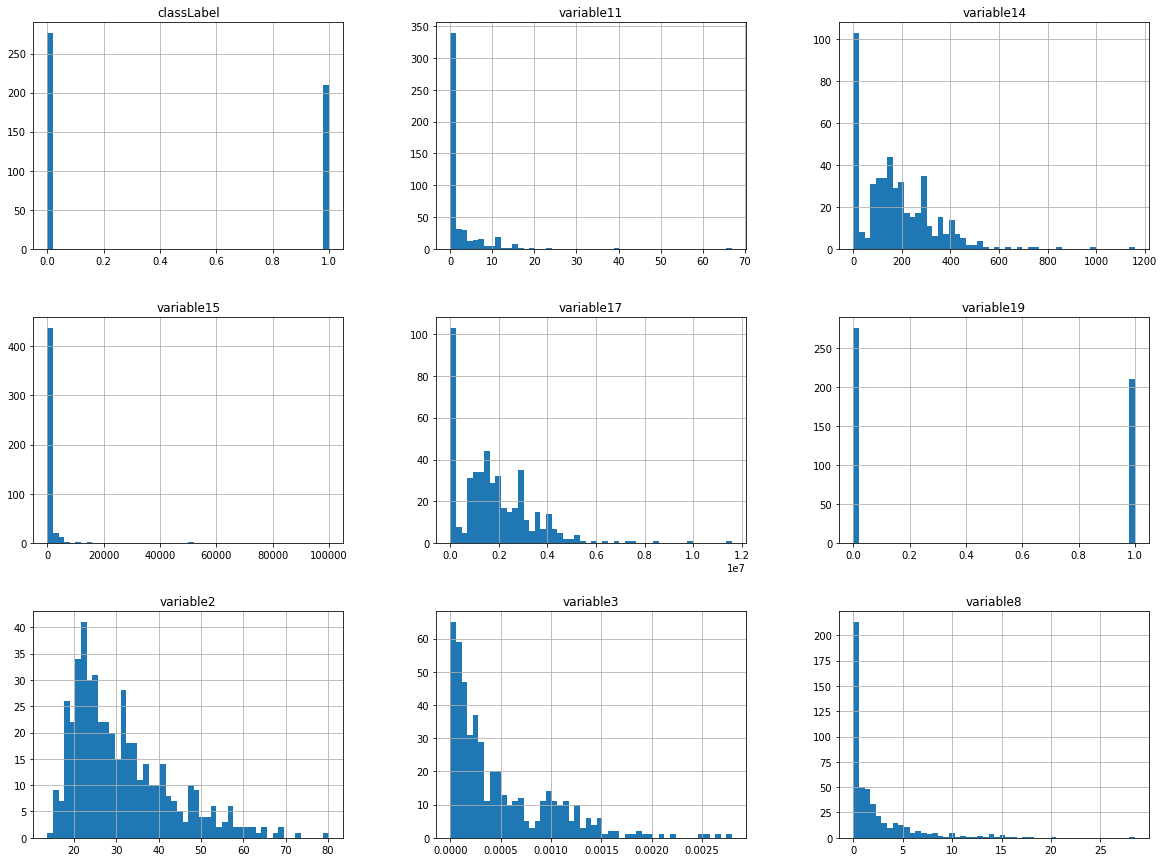

In [33]:
data_df.hist(bins=50, figsize=(20,15))
plt.show()

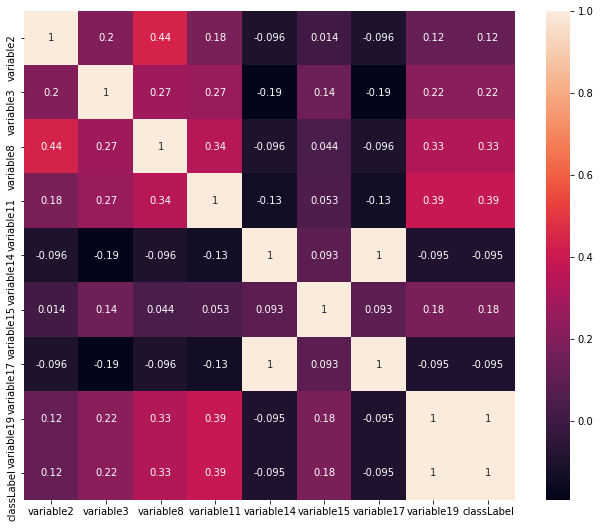

In [34]:
corr_matrix = data_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
corr_matrix[target_feature].sort_values(ascending=False)

classLabel    1.000000
variable19    1.000000
variable11    0.389774
variable8     0.333296
variable3     0.219343
variable15    0.183429
variable2     0.121010
variable14   -0.094843
variable17   -0.094843
Name: classLabel, dtype: float64

##### Some notes:
* Variable 19 is highly correlated. This can decrease the model's availablility to learn, and decrease generalization performance on the test set. 
* Variable 19 is highly correlated with the training set but shows a very low correlation with the testing set.
* We got some promising variables that correlates with the target features: including variable 9, 10, 11, 8, 3.
* Variables 12, 14, 17 are shows insignifcant linear relations.
* Variables 14, 17 are the same feature.
* We need to test the correlation of categorical values using chi2
* But first we will start with a simple model

# 5. Data preparation

## 5.1. Encoding categorical features

In [36]:
# Encoding categorical features
data_df_enc = pd.get_dummies(data=data_df, columns=categorical_features)
data_df_enc.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel,variable1_a,...,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,17.92,0.000054,1.750,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
1,16.92,0.000034,0.290,0,200.0,0,2000000.0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,31.25,0.000112,0.000,1,96.0,19,960000.0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
3,48.17,0.000133,0.335,0,0.0,120,0.0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
4,32.33,0.000350,0.500,0,232.0,0,2320000.0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [37]:
data_df_enc.columns

Index(['variable2', 'variable3', 'variable8', 'variable11', 'variable14',
       'variable15', 'variable17', 'variable19', 'classLabel', 'variable1_a',
       'variable1_b', 'variable4_l', 'variable4_u', 'variable4_y',
       'variable5_g', 'variable5_gg', 'variable5_p', 'variable6_W',
       'variable6_aa', 'variable6_c', 'variable6_cc', 'variable6_d',
       'variable6_e', 'variable6_ff', 'variable6_i', 'variable6_j',
       'variable6_k', 'variable6_m', 'variable6_q', 'variable6_r',
       'variable6_x', 'variable7_bb', 'variable7_dd', 'variable7_ff',
       'variable7_h', 'variable7_j', 'variable7_n', 'variable7_o',
       'variable7_v', 'variable7_z', 'variable9_f', 'variable9_t',
       'variable10_f', 'variable10_t', 'variable12_f', 'variable12_t',
       'variable13_g', 'variable13_p', 'variable13_s'],
      dtype='object')

In [38]:
data_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 489
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   variable2     486 non-null    float64
 1   variable3     486 non-null    float64
 2   variable8     486 non-null    float64
 3   variable11    486 non-null    int64  
 4   variable14    486 non-null    float64
 5   variable15    486 non-null    int64  
 6   variable17    486 non-null    float64
 7   variable19    486 non-null    int64  
 8   classLabel    486 non-null    int64  
 9   variable1_a   486 non-null    uint8  
 10  variable1_b   486 non-null    uint8  
 11  variable4_l   486 non-null    uint8  
 12  variable4_u   486 non-null    uint8  
 13  variable4_y   486 non-null    uint8  
 14  variable5_g   486 non-null    uint8  
 15  variable5_gg  486 non-null    uint8  
 16  variable5_p   486 non-null    uint8  
 17  variable6_W   486 non-null    uint8  
 18  variable6_aa  486 non-null    

## 5.2. Splitting data

In [39]:
from sklearn.model_selection import train_test_split

def split_data(df, target_feature, test_size=0.2):
    
    y = df[target_feature]
    X = df.drop(target_feature, axis=1)
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [40]:
X_train, X_cv, y_train, y_cv = split_data(data_df_enc, target_feature)

print(X_train.shape, y_train.shape, X_cv.shape, y_cv.shape)

(388, 48) (388,) (98, 48) (98,)


# 6. Training simple classifiers

In [41]:
from sklearn.metrics import classification_report

In [42]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # Training set
    y_train_pred = model.predict(X_train) 
    print("Training set classification report\n", classification_report(y_train_pred, y_train))
    
    print("---------------\n")
    
    # Cross-validation set
    y_test_pred = model.predict(X_test)
    print("Cross-validation set classification report\n", classification_report(y_test_pred, y_test))

## 6.1. Decision tree classifier 

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
evaluate_model(tree_clf, X_train, X_cv, y_train, y_cv)

Training set classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       169

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388

---------------

Cross-validation set classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        41

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Definitely overfitted

## 6.2. Training a SVM classifier

In [44]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
evaluate_model(svc_clf, X_train, X_cv, y_train, y_cv)

Training set classification report
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       250
           1       0.49      0.60      0.54       138

    accuracy                           0.64       388
   macro avg       0.62      0.63      0.62       388
weighted avg       0.66      0.64      0.64       388

---------------

Cross-validation set classification report
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        61
           1       0.44      0.49      0.46        37

    accuracy                           0.57        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.58      0.57      0.58        98



## 6.3. Training a random forest classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate_model(rf_clf, X_train, X_cv, y_train, y_cv)

Training set classification report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       226
           1       0.93      0.98      0.95       162

    accuracy                           0.96       388
   macro avg       0.96      0.96      0.96       388
weighted avg       0.96      0.96      0.96       388

---------------

Cross-validation set classification report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.98      1.00      0.99        40

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



# 7. More preparation

In [46]:
corr_matrix = data_df_enc.corr()
corr_matrix[target_feature].sort_values(ascending=False)

classLabel      1.000000
variable19      1.000000
variable9_t     0.736954
variable10_t    0.422456
variable11      0.389774
variable8       0.333296
variable3       0.219343
variable6_x     0.191755
variable4_u     0.186341
variable5_g     0.186341
variable15      0.183429
variable6_q     0.159694
variable6_cc    0.158676
variable7_h     0.151967
variable2       0.121010
variable13_g    0.100372
variable12_t    0.089165
variable4_l     0.073695
variable5_gg    0.073695
variable1_a     0.065591
variable7_z     0.058462
variable7_bb    0.048133
variable7_n     0.037319
variable6_r     0.037319
variable6_c     0.033232
variable6_e     0.014793
variable13_p    0.008811
variable7_o     0.008811
variable6_W     0.003610
variable6_aa   -0.016620
variable7_v    -0.030970
variable7_j    -0.035723
variable6_m    -0.044380
variable7_dd   -0.047770
variable6_j    -0.058197
variable1_b    -0.065591
variable6_d    -0.068790
variable12_f   -0.089165
variable14     -0.094843
variable17     -0.094843


* We can notice from the correlations that variable4 and variable5 are the same just with different corrosponding values.
* Also notice that the range between -0.09 and 0.089 contains variables 6, 7, 1, 13 so we may drop one or more of these features and see the outcome. 

#### Steps:
* Drop 'variable19' since it makes our model hard to generalize.
* Drop variable 14 since it's the same as variable 17
* Drop variable 4 since it's the same as variable 5
* Scaling numerical features


In [47]:
# Scaling data
from sklearn.preprocessing import StandardScaler

def scale(X_train, X_cv, features_to_scale):
    scaler = StandardScaler()
    X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
    X_cv[features_to_scale] = scaler.transform(X_cv[features_to_scale])
    
    return scaler
    
scaler = scale(X_train, X_cv, X_train.columns)

In [48]:
def prepare_training_data(data_df, cols_to_drop):

    # Dropping duplicates and unnecessary features
    data_df.drop_duplicates(inplace=True)
    data_df.drop(cols_to_drop, axis =1, inplace=True)

    # Formatting data
    data_df['variable3'] = data_df['variable3'].apply(lambda x: float(x.replace(',', '.')))
    data_df['variable2'] = data_df['variable2'].apply(lambda x: float(str(x).replace(',', '.')))
    data_df['variable8'] = data_df['variable8'].apply(lambda x: float(x.replace(',', '.')))

    data_df['classLabel'] = data_df['classLabel'].replace('no.', 0)
    data_df['classLabel'] = data_df['classLabel'].replace('yes.', 1)

    # Handling missing values
    target_feature = 'classLabel'
    categorical_features = data_df.select_dtypes(exclude=['float64', 'int64']).columns
    numerical_features = data_df.select_dtypes(include=['float64', 'int64']).drop(target_feature, axis=1).columns

    X = data_df.drop(target_feature, axis=1)
    X_categorical = X[categorical_features]
    X_numerical = X[numerical_features]

    ## Filling missing numerical values with the mean
    X_numerical_mean = X_numerical.mean()
    X_numerical = X_numerical.fillna(X_numerical_mean)
    data_df[numerical_features] = X_numerical

    ## Filling missing categorical values with the mode
    X_categorical_mode = X_categorical.mode().iloc[0]
    X_categorical = X_categorical.fillna(X_categorical_mode)
    data_df[categorical_features] = X_categorical

    # Encoding categorical features
    data_df_enc = pd.get_dummies(data=data_df, columns=categorical_features)
    encoded_features = data_df_enc.columns

    # Splitting data
    X_train, X_cv, y_train, y_cv = split_data(data_df_enc, target_feature)
    
    # Scaling numerical features
    scaler = scale(X_train, X_cv, X_train.columns)
    
    return X_train, X_cv, y_train, y_cv, X_categorical_mode, X_numerical_mean, encoded_features, scaler

In [49]:
data_df2 = pd.read_csv(TRAIN_DATA_PATH, sep=';')
cols_to_drop =  ['variable18', 'variable19', 'variable14', 'variable4']

X_train, X_cv, y_train, y_cv, X_categorical_mode, X_numerical_mean, encoded_features, scaler = prepare_training_data(data_df2, cols_to_drop)

In [50]:
# Training a random forest classifier
rf_clf2 = RandomForestClassifier(max_depth=2, random_state=42)
rf_clf2.fit(X_train, y_train)
evaluate_model(rf_clf2, X_train, X_cv, y_train, y_cv)

Training set classification report
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       247
           1       0.76      0.91      0.83       145

    accuracy                           0.86       392
   macro avg       0.85      0.87      0.85       392
weighted avg       0.87      0.86      0.86       392

---------------

Cross-validation set classification report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        62
           1       0.82      0.92      0.87        36

    accuracy                           0.90        98
   macro avg       0.89      0.90      0.89        98
weighted avg       0.90      0.90      0.90        98



In [51]:
from sklearn.metrics import f1_score

def choose_features_to_drop(df, cols_to_drop, features, X_train, X_cv, y_train, y_cv):

    for feature in features:
        test_df = df.copy()

        cols = cols_to_drop
        cols.append(feature)
        
        X_train, X_cv, y_train, y_cv, X_categorical_mode, X_numerical_mean, encoded_features, scaler = prepare_training_data(test_df, cols)

        rf_clf3 = RandomForestClassifier(max_depth=2, random_state=42)
        rf_clf3.fit(X_train, y_train)

        y_pred = rf_clf3.predict(X_cv) 
        print("column dropped: ", feature, "F1-score: ", f1_score(y_cv, y_pred, average='weighted'))

        del test_df

In [52]:
# Test other features
data_df2 = pd.read_csv(TRAIN_DATA_PATH, sep=';')
cols_to_test = ['variable6', 'variable7', 'variable1', 'variable13']
cols_to_drop =  ['variable18', 'variable19', 'variable14', 'variable4']

choose_features_to_drop(data_df2, cols_to_drop, cols_to_test, X_train, X_cv, y_train, y_cv)

column dropped:  variable6 F1-score:  0.9188532555879495
column dropped:  variable7 F1-score:  0.8975157207602729
column dropped:  variable1 F1-score:  0.907974484828011
column dropped:  variable13 F1-score:  0.8979591836734694


We will drop variable6 also since it seems to decrease our model's accuracy

In [53]:
data_df2 = pd.read_csv(TRAIN_DATA_PATH, sep=';')
cols_to_drop = ['variable18', 'variable19', 'variable14', 'variable4', 'variable6']

X_train, X_cv, y_train, y_cv, X_categorical_mode, X_numerical_mean, encoded_features, scaler = prepare_training_data(data_df2, cols_to_drop)

rf_clf3 = RandomForestClassifier(max_depth=2, random_state=42)
rf_clf3.fit(X_train, y_train)

evaluate_model(rf_clf3, X_train, X_cv, y_train, y_cv)

Training set classification report
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       192
           1       0.90      0.78      0.83       200

    accuracy                           0.84       392
   macro avg       0.85      0.84      0.84       392
weighted avg       0.85      0.84      0.84       392

---------------

Cross-validation set classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.95      0.86      0.90        44

    accuracy                           0.92        98
   macro avg       0.92      0.91      0.92        98
weighted avg       0.92      0.92      0.92        98



# 8. Tuning

##### Steps
* Train on the whole training set
* Tuning the model

In [54]:
def prepare_training_data(data_df):

    # Dropping duplicates and unnecessary features
    data_df.drop_duplicates(inplace=True)
    data_df.drop(['variable18', 'variable19', 'variable14', 'variable4', 'variable6'], axis =1, inplace=True)

    # Formatting data
    data_df['variable3'] = data_df['variable3'].apply(lambda x: float(x.replace(',', '.')))
    data_df['variable2'] = data_df['variable2'].apply(lambda x: float(str(x).replace(',', '.')))
    data_df['variable8'] = data_df['variable8'].apply(lambda x: float(x.replace(',', '.')))

    data_df['classLabel'] = data_df['classLabel'].replace('no.', 0)
    data_df['classLabel'] = data_df['classLabel'].replace('yes.', 1)

    # Handling missing values
    target_feature = 'classLabel'
    categorical_features = data_df.select_dtypes(exclude=['float64', 'int64']).columns
    numerical_features = data_df.select_dtypes(include=['float64', 'int64']).drop(target_feature, axis=1).columns

    X = data_df.drop(target_feature, axis=1)
    X_categorical = X[categorical_features]
    X_numerical = X[numerical_features]

    ## Filling missing numerical values with the mean
    X_numerical_mean = X_numerical.mean()
    X_numerical = X_numerical.fillna(X_numerical_mean)
    data_df[numerical_features] = X_numerical

    ## Filling missing categorical values with the mode
    X_categorical_mode = X_categorical.mode().iloc[0]
    X_categorical = X_categorical.fillna(X_categorical_mode)
    data_df[categorical_features] = X_categorical

    # Encoding categorical features
    data_df_enc = pd.get_dummies(data=data_df, columns=categorical_features)
    encoded_features = data_df_enc.columns

    # Splitting data
    y = data_df_enc[target_feature]
    X = data_df_enc.drop(target_feature, axis=1)
    
    # Scaling numerical features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y, X_categorical_mode, X_numerical_mean, encoded_features, scaler

In [55]:
data_df2 = pd.read_csv(TRAIN_DATA_PATH, sep=';')
X, y, X_categorical_mode, X_numerical_mean, encoded_features, scaler = prepare_training_data(data_df2)

In [56]:
from pprint import pprint

In [57]:
print('Parameters currently in use:\n')
pprint(rf_clf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 400, 800, 1600, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 800, 1600, 2000]}


In [68]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator =  RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [69]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [70]:
best_rf_clf = rf_random.best_estimator_

# 9. Evaluating model on the testing set

In [71]:
def prepare_input(df, X_categorical_mode, X_numerical_mean, encoded_features, scaler):
    '''
    prepare new data for prediciton
    '''
    
    # Dropping unnecessary features
    df.drop(['variable18', 'variable19', 'variable14', 'variable4', 'variable6'], axis =1, inplace=True)
    
    # Formatting data
    df['variable3'] = df['variable3'].apply(lambda x: float(x.replace(',', '.')))
    df['variable2'] = df['variable2'].apply(lambda x: float(str(x).replace(',', '.')))
    df['variable8'] = df['variable8'].apply(lambda x: float(x.replace(',', '.')))

    df['classLabel'] = df['classLabel'].replace('no.', 0)
    df['classLabel'] = df['classLabel'].replace('yes.', 1)

    # Categorizing features
    target_feature = 'classLabel'
    categorical_features = df.select_dtypes(exclude=['float64', 'int64']).columns
    numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(target_feature, axis=1).columns

    # Handling missing values
    df[numerical_features] = df[numerical_features].fillna(X_numerical_mean)
    df[categorical_features] = df[categorical_features].fillna(X_categorical_mode)
    
    # Encoding categorical features
    df_enc = pd.get_dummies(data=df, columns=categorical_features)
    df_enc = df_enc.reindex(columns = encoded_features, fill_value=0)
    
    # Splitting data
    y = df_enc[target_feature]
    X = df_enc.drop(target_feature, axis=1)
    
    # Scaling data
    X = pd.DataFrame(scaler.transform(X))
    
    return X, y

In [72]:
def evaluate_testing_set(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    print("Testing set classification report\n", classification_report(y_test_pred, y_test))

In [73]:
test_df = pd.read_csv(TEST_DATA_PATH, sep=';')
X_test, y_test = prepare_input(test_df, X_categorical_mode, X_numerical_mean, encoded_features, scaler)

In [74]:
evaluate_testing_set(best_rf_clf, X_test, y_test)

Testing set classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        94
           1       0.95      0.83      0.88       106

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



# 10. Saving the model

In [75]:
import joblib
joblib.dump(best_rf_clf, 'classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']